In [1]:
import pyforest
import category_encoders as ce
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("/Users/om/Desktop/My Mac/My_Assignment Data/Fraud_check.csv")
data

<IPython.core.display.Javascript object>

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## `EDA`

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.shape

(600, 6)

In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


## `LabelEncoder is used to normalize labels`

In [7]:
label_encoder = LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

<IPython.core.display.Javascript object>

## `Rename Column`

In [8]:
data.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'tax_in', 'City.Population': 'city_population','Work.Experience': 'work_exp'}, inplace= True)
data['status'] = data['tax_in'].apply(lambda tax_in: 'Risky' if tax_in <= 30000 else 'Good')
data.head()

,Undergrad,marital_status,tax_in,city_population,work_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


## `Droping Tax_in Column`

In [9]:
data.drop(['tax_in'], axis=1, inplace=True)
data['status'] = label_encoder.fit_transform(data['status'])

X = data.iloc[:,0:5]
Y = data['status']

In [10]:
X

,Undergrad,marital_status,city_population,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [11]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int64

In [12]:
Y.value_counts()

0    476
1    124
Name: status, dtype: int64

## `Splitting data into training and test data set`

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state=40)

<IPython.core.display.Javascript object>

In [14]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

## <span style='background :yellow'> Plot the Decision tree`</span>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Decision tree')

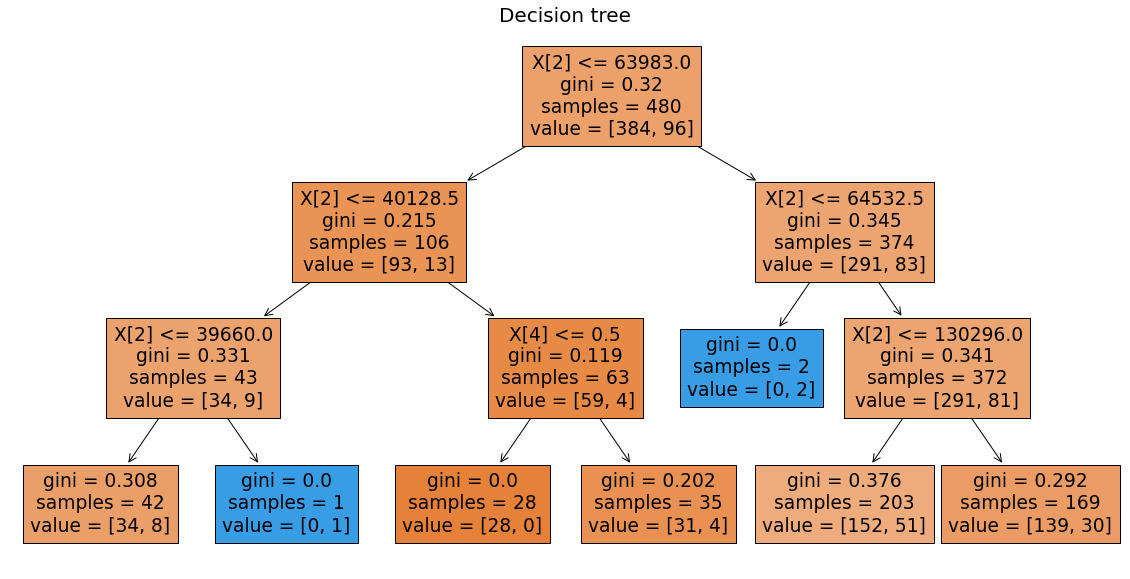

In [15]:
fig=plt.figure(figsize=(20,10))
tree.plot_tree(model, filled = True);
plt.title('Decision tree',fontsize=20)

## `Predicting on test data`

In [16]:
pred = model.predict(x_test)
pd.Series(pred).value_counts()

<IPython.core.display.Javascript object>

0    119
1      1
dtype: int64

In [17]:
x_test

,Undergrad,marital_status,city_population,work_exp,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
102,1,0,91488,23,0
577,1,1,52940,5,1
18,1,0,59269,6,0
560,0,0,182562,24,0


In [18]:
np.mean(pred==y_test)

<IPython.core.display.Javascript object>

0.7583333333333333

In [19]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



# <span style='background :yellow'> Plot Decision Tree </span>

### <span style='background :yellow'> 0 is Good & 1 is Risky </span>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Decision tree using Gini')

<Figure size 1440x1080 with 0 Axes>

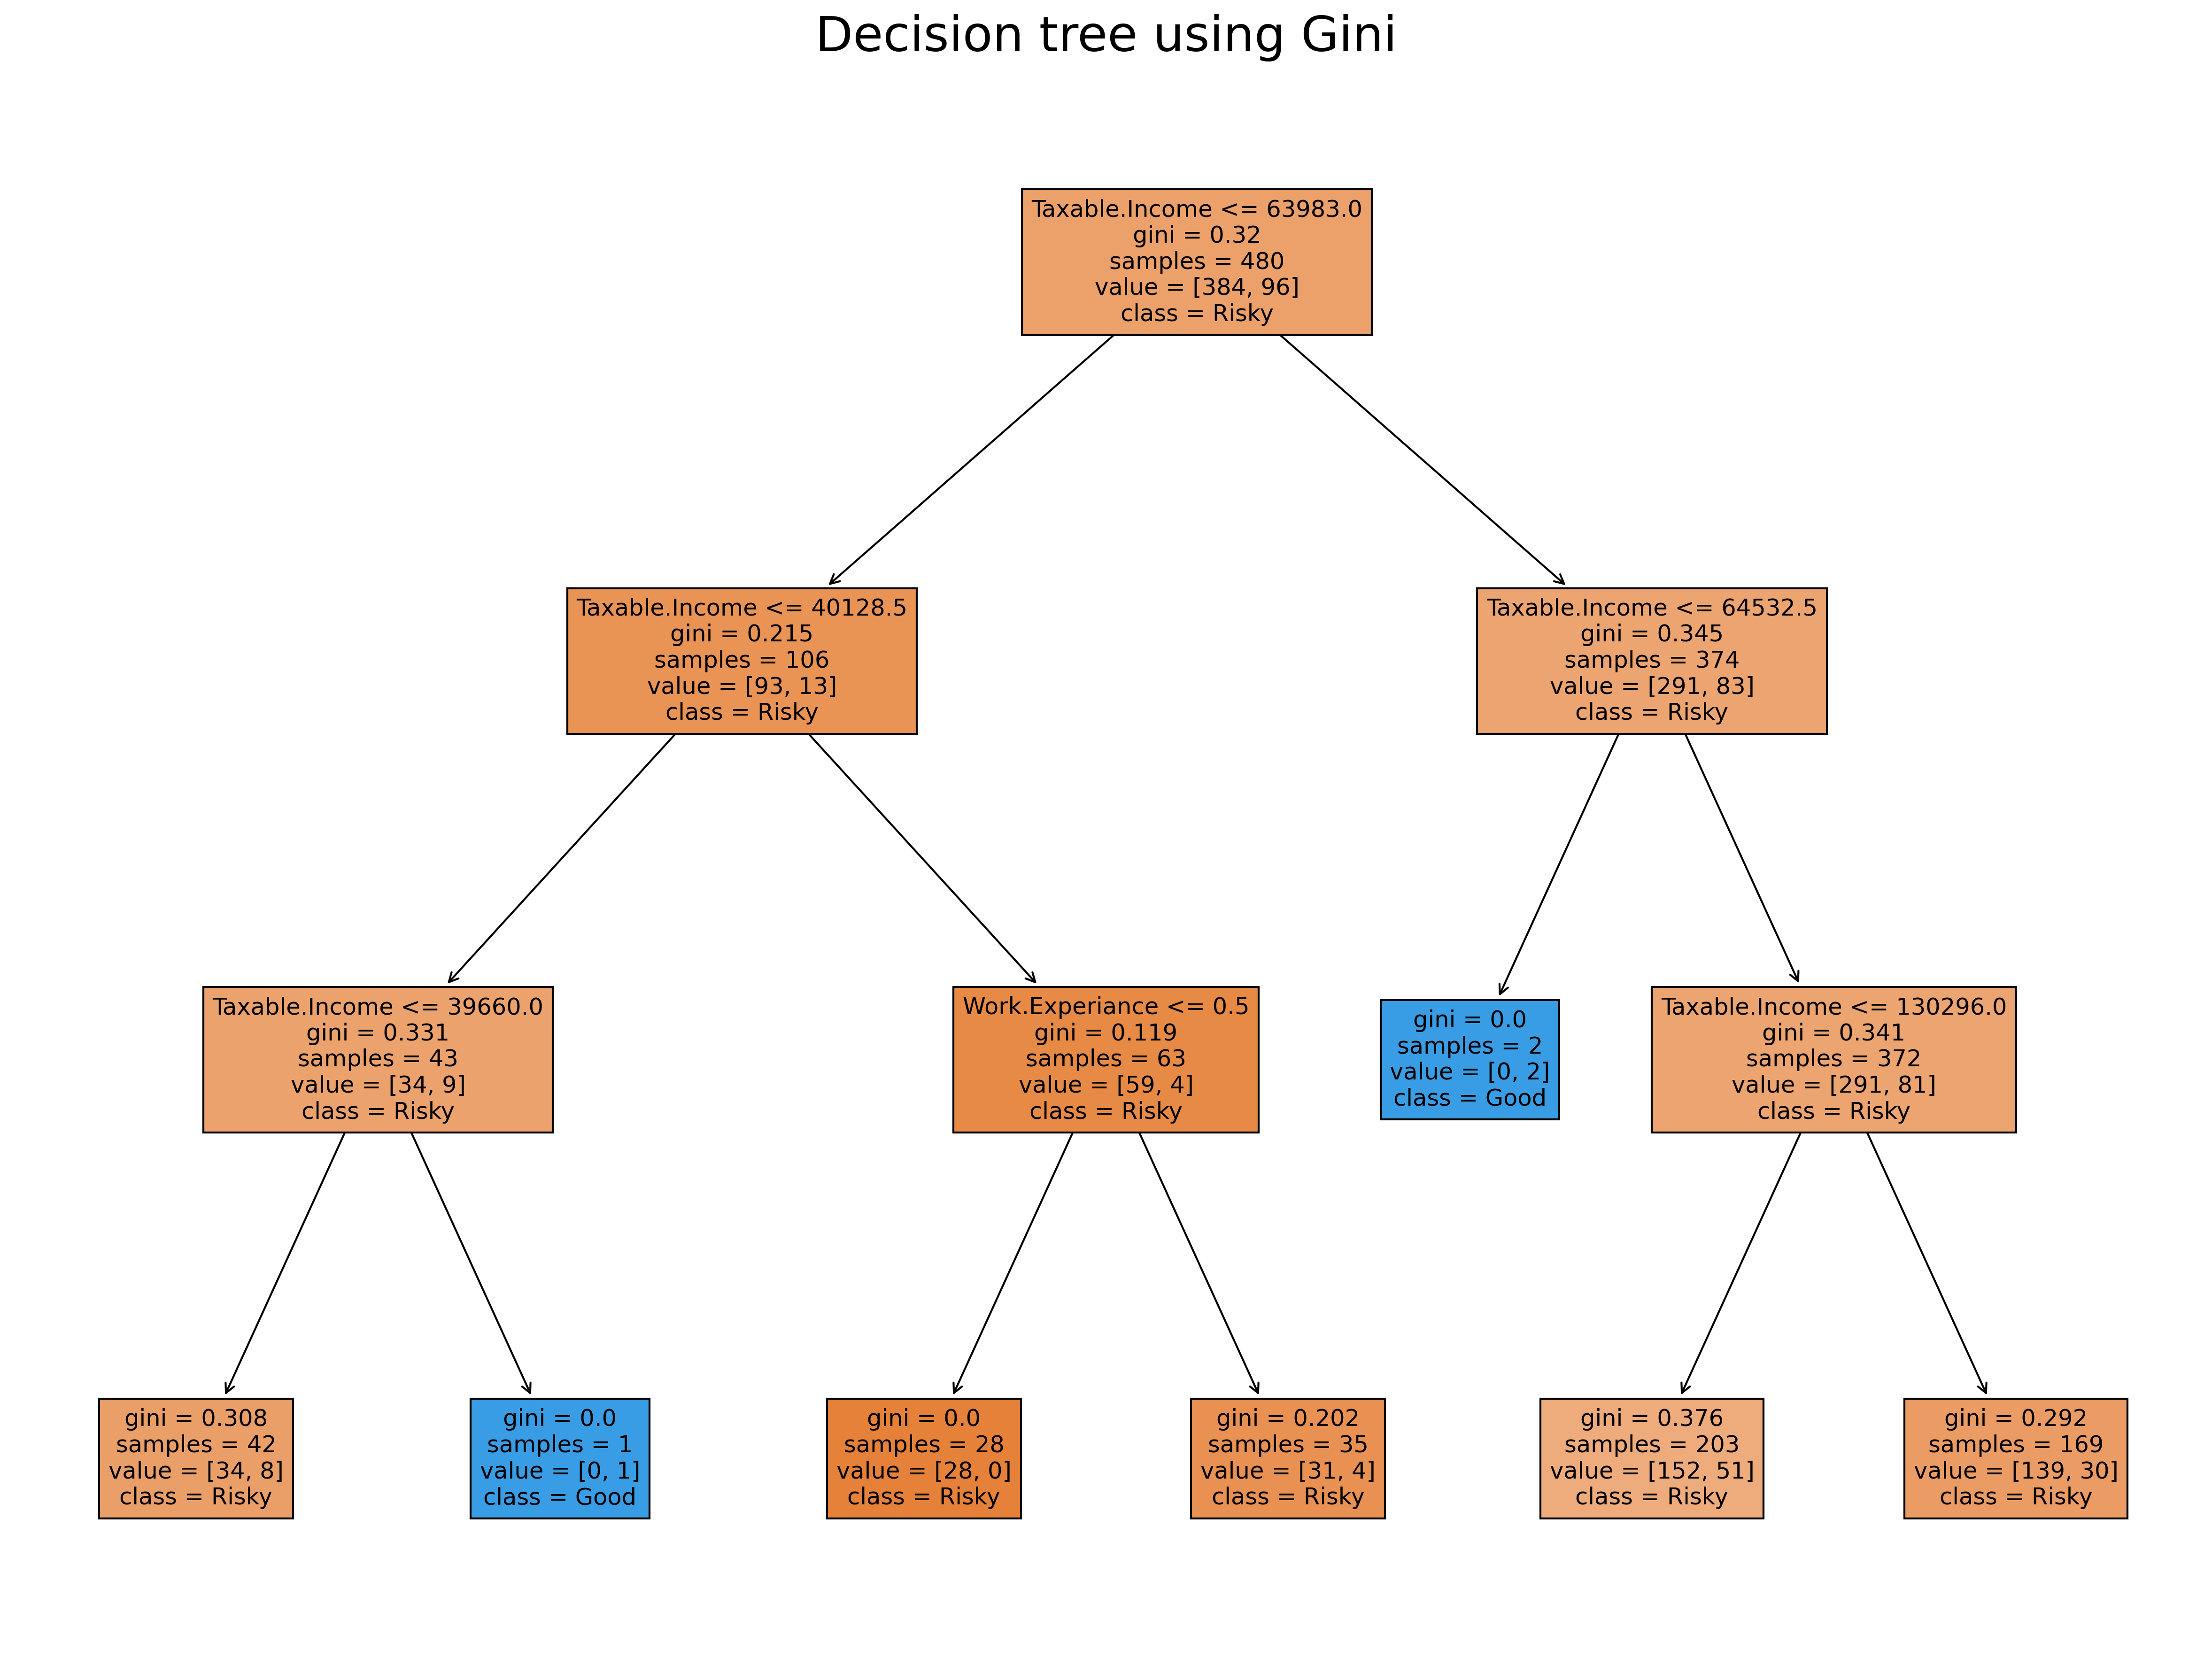

In [20]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance']
cn = ['Risky', 'Good']
fig=plt.figure(figsize=(20,15))
fig, axes = plt.subplots(nrows=1, figsize= (20,15),ncols=1, dpi=300)
tree.plot_tree(model,feature_names = fn,class_names = cn,filled = True);
plt.title('Decision tree using Gini',fontsize=25)

#### ***`From Above Table We Found That City Count & Marital Status Is Important In This Feature.`***